#### About this Activity

For Problem Set 4, you're required to train a regressor that predicts the number of bikes checked out from a Seoul Bike Share program.

#### About the Dataset

You have been given Training Samples and Outcomes as well as a set of Test Samples (with no ground truth outcomes). These can be found in the Data tab above.

The samples are unique hour-long segments during a calendar year (1/12/2017 to 30/11/2018) with some weather and metadata features. The outcomes are the number of bikes checked out during that hour.

Your objective is to provide a test-outcomes CSV file that predicts the outcomes for each sample. We have provided a sample submission that demonstrates a successful format of the predictions file to submit to Kaggle. See the Data page for full details.

In [ ]:
import csv
import numpy as np
import pandas as pd
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
import seaborn as sns

First, the model will be tested on the training data by splitting it into training and validation sets. This is because the test output is not included.

Sizes of the Datasets
--------------
X train: (4292, 14)
X val: (1840, 14)
X test: (2628, 14)
--------------
y train: (4292,)
y val (1840,)


,Index,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1802,1802,29/10/2018,15,11.0,46,3.4,2000,-0.1,0.57,0.0,0.0,Autumn,No Holiday,Yes
5584,5584,16/06/2018,6,16.3,66,0.7,2000,9.9,0.05,0.0,0.0,Summer,No Holiday,Yes
3735,3735,30/12/2017,5,-1.2,81,0.8,258,-4.0,0.00,0.0,0.0,Winter,No Holiday,Yes
1708,1708,5/9/2018,9,23.4,59,3.0,1974,14.9,1.46,0.0,0.0,Autumn,No Holiday,Yes
4436,4436,10/1/2018,20,-8.9,41,2.3,2000,-19.7,0.00,0.0,0.0,Winter,No Holiday,Yes


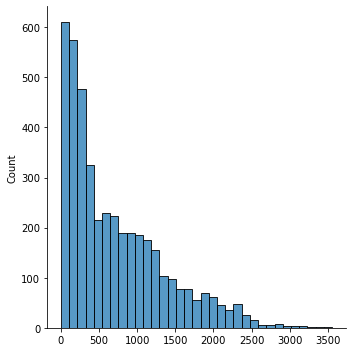

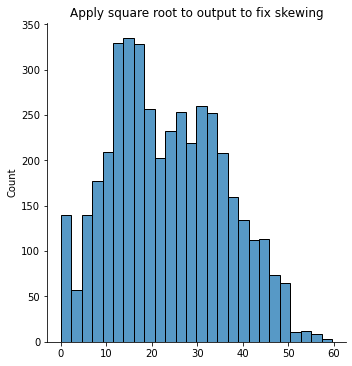

In [16]:
file = open('XTrain.csv')
X_train = pd.read_csv('XTrain.csv')
X_train_full = X_train
X_test = pd.read_csv('XTest.csv')
df2 = pd.read_csv('ytrain.csv')
y_train = df2["Rented Bike Count"]
y_train = np.array(y_train)
y_train_full = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=222)
print("Sizes of the Datasets")
print("--------------")
print("X train:", X_train.shape)
print("X val:", X_val.shape)
print("X test:", X_test.shape)
print("--------------")
print("y train:", y_train.shape)
print("y val", y_val.shape)
#Square root applied to outpout to fix skewing
sns.displot(y_train)
y_train = y_train**(.5)
sns.displot(y_train).set(title='Apply square root to output to fix skewing')
X_train.head()

In [17]:
#convert date column to string
X_train = X_train.astype({'Date':'string'})
X_val = X_val.astype({'Date':'string'})
X_test = X_test.astype({'Date':'string'})
#create columns for day, month, and year
X_train[["day", "month", "year"]] = X_train['Date'].str.split("/", expand = True)
X_val[["day", "month", "year"]] = X_val['Date'].str.split("/", expand = True)
X_test[["day", "month", "year"]] = X_test['Date'].str.split("/", expand = True)
#get numpy arrays for day, month, and year
X_train[["day"]] = X_train[["day"]].astype(str).astype(int)
X_train[["month"]] = X_train[["month"]].astype(str).astype(int)
X_train[["year"]] = X_train[["year"]].astype(str).astype(int)
train_days = X_train[["day"]].to_numpy()
train_months = X_train[["month"]].to_numpy()
train_years = X_train[["year"]].to_numpy()
X_val[["day"]] = X_val[["day"]].astype(str).astype(int)
X_val[["month"]] = X_val[["month"]].astype(str).astype(int)
X_val[["year"]] = X_val[["year"]].astype(str).astype(int)
val_days = X_val[["day"]].to_numpy()
val_months = X_val[["month"]].to_numpy()
val_years = X_val[["year"]].to_numpy()
X_test[["day"]] = X_test[["day"]].astype(str).astype(int)
X_test[["month"]] = X_test[["month"]].astype(str).astype(int)
X_test[["year"]] = X_test[["year"]].astype(str).astype(int)
test_days = X_test[["day"]].to_numpy()
test_months = X_test[["month"]].to_numpy()
test_years = X_test[["year"]].to_numpy()



In [18]:
#get day of the week
import datetime
train_dayofweek = []
for i in range(train_days.shape[0]):
    day = train_days[i][0]
    month = train_months[i][0]
    year = train_years[i][0]
    x_date = datetime.date(year, month, day).weekday()
    train_dayofweek.append(x_date)    
train_dayofweek = np.array(train_dayofweek)
val_dayofweek = []
for i in range(val_days.shape[0]):
    day = val_days[i][0]
    month = val_months[i][0]
    year = val_years[i][0]
    x_date = datetime.date(year, month, day).weekday()
    val_dayofweek.append(x_date)    
val_dayofweek = np.array(val_dayofweek)
test_dayofweek = []
for i in range(test_days.shape[0]):
    day = test_days[i][0]
    month = test_months[i][0]
    year = test_years[i][0]
    x_date = datetime.date(year, month, day).weekday()
    test_dayofweek.append(x_date)    
test_dayofweek = np.array(test_dayofweek)
#add to dataframe
X_train['Day_of_Week'] = train_dayofweek.tolist()
X_val['Day_of_Week'] = val_dayofweek.tolist()
X_test['Day_of_Week'] = test_dayofweek.tolist()

In [19]:
#get day type weekend = 1, weekday =0
train_day_type = np.zeros(len(X_train))
for i in range(train_day_type.shape[0]):
    if X_train['Day_of_Week'].iloc[i] == 0:
        train_day_type[i] = 1
    if X_train['Day_of_Week'].iloc[i] == 6:
        train_day_type[i] = 1        
val_day_type = np.zeros(len(X_val))
for i in range(val_day_type.shape[0]):
    if X_val['Day_of_Week'].iloc[i] == 0:
        val_day_type[i] = 1
    if X_val['Day_of_Week'].iloc[i] == 6:
        val_day_type[i] = 1        
test_day_type = np.zeros(len(X_test))
for i in range(test_day_type.shape[0]):
    if X_test['Day_of_Week'].iloc[i] == 0:
        test_day_type[i] = 1
    if X_test['Day_of_Week'].iloc[i] == 6:
        test_day_type[i] = 1
#add to dataframe
X_train['Day_type'] = train_day_type.tolist()
X_val['Day_type'] = val_day_type.tolist()
X_test['Day_type'] = test_day_type.tolist()
X_train.head()

,Index,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year,Day_of_Week,Day_type
1802,1802,29/10/2018,15,11.0,46,3.4,2000,-0.1,0.57,0.0,0.0,Autumn,No Holiday,Yes,29,10,2018,0,1.0
5584,5584,16/06/2018,6,16.3,66,0.7,2000,9.9,0.05,0.0,0.0,Summer,No Holiday,Yes,16,6,2018,5,0.0
3735,3735,30/12/2017,5,-1.2,81,0.8,258,-4.0,0.00,0.0,0.0,Winter,No Holiday,Yes,30,12,2017,5,0.0
1708,1708,5/9/2018,9,23.4,59,3.0,1974,14.9,1.46,0.0,0.0,Autumn,No Holiday,Yes,5,9,2018,2,0.0
4436,4436,10/1/2018,20,-8.9,41,2.3,2000,-19.7,0.00,0.0,0.0,Winter,No Holiday,Yes,10,1,2018,2,0.0


In [20]:
#drop columns
X_train=X_train.drop(columns=['Date','day','Index'],axis=1)
X_val=X_val.drop(columns=['Date','day','Index'],axis=1)
X_test=X_test.drop(columns=['Date','day','Index'],axis=1)
# convert columns to categorical before one hot encoding
X_train['Hour'] = X_train['Hour'].astype('category')
X_train['month'] = X_train['month'].astype('category')
X_train['Day_of_Week'] = X_train['Day_of_Week'].astype('category')
X_val['Hour'] = X_val['Hour'].astype('category')
X_val['month'] = X_val['month'].astype('category')
X_val['Day_of_Week'] = X_val['Day_of_Week'].astype('category')
X_test['Hour'] = X_test['Hour'].astype('category')
X_test['month'] = X_test['month'].astype('category')
X_test['Day_of_Week'] = X_test['Day_of_Week'].astype('category')
# Using Pandas get Dummies for Encoding categorical features
X_train = pd.get_dummies(X_train,drop_first=True,sparse=True)
X_val = pd.get_dummies(X_val,drop_first=True,sparse=True)
X_test = pd.get_dummies(X_test,drop_first=True,sparse=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4292 entries, 1802 to 3206
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Temperature(�C)            4292 non-null   float64         
 1   Humidity(%)                4292 non-null   int64           
 2   Wind speed (m/s)           4292 non-null   float64         
 3   Visibility (10m)           4292 non-null   int64           
 4   Dew point temperature(�C)  4292 non-null   float64         
 5   Solar Radiation (MJ/m2)    4292 non-null   float64         
 6   Rainfall(mm)               4292 non-null   float64         
 7   Snowfall (cm)              4292 non-null   float64         
 8   year                       4292 non-null   int64           
 9   Day_type                   4292 non-null   float64         
 10  Hour_1                     4292 non-null   Sparse[uint8, 0]
 11  Hour_2                     4292 non-null

In [21]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import r2_score

In [22]:
#Train XGB
xgb_model = xgb.XGBRegressor(n_estimators=370, eta=0.17)
xgb_model.fit(X_train, y_train)
ypred = xgb_model.predict(X_test)
#Predict values and get rid of negative values
y_pred_train = xgb_model.predict(X_train)
y_pred_train = y_pred_train.clip(min=0)
y_pred_val = xgb_model.predict(X_val)
y_pred_val = y_pred_val.clip(min=0)
y_pred_test = xgb_model.predict(X_test)
y_pred_test = y_pred_test.clip(min=0)
# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 for training:', R2)
#square validation predicted value as the square root of the validation outpout was not taken earlier
#This is done because the kaggle competition does not allow us to alter the test output
y_pred_val = y_pred_val**(2)
R2 = r2_score((y_val), (y_pred_val))
print('R2 for validation:', R2)

R2 for training: 0.9976503676019651
R2 for validation: 0.9246541986409895


Now, the whole training dataset will be used to train the model and preddict the test values. The n_estimators will be increased to achieve a similar training accuracy to the one derived above.

In [23]:
file = open('XTrain.csv')
X_train = pd.read_csv('XTrain.csv')
X_train_full = X_train
X_test = pd.read_csv('XTest.csv')
df2 = pd.read_csv('ytrain.csv')
y_train = df2["Rented Bike Count"]
y_train = np.array(y_train)
y_train_full = y_train
print("Sizes of the Datasets")
print("--------------")
print("X train:", X_train.shape)
print("X test:", X_test.shape)
print("--------------")
print("y train:", y_train.shape)
#apply square root to outpout to fix skewing
y_train = y_train**(.5)

Sizes of the Datasets
--------------
X train: (6132, 14)
X test: (2628, 14)
--------------
y train: (6132,)


In [24]:
#convert date column to string
X_train = X_train.astype({'Date':'string'})
X_test = X_test.astype({'Date':'string'})
#create columns for day, month, and year
X_train[["day", "month", "year"]] = X_train['Date'].str.split("/", expand = True)
X_test[["day", "month", "year"]] = X_test['Date'].str.split("/", expand = True)
#get numpy arrays for day, month, and year
X_train[["day"]] = X_train[["day"]].astype(str).astype(int)
X_train[["month"]] = X_train[["month"]].astype(str).astype(int)
X_train[["year"]] = X_train[["year"]].astype(str).astype(int)
train_days = X_train[["day"]].to_numpy()
train_months = X_train[["month"]].to_numpy()
train_years = X_train[["year"]].to_numpy()
X_test[["day"]] = X_test[["day"]].astype(str).astype(int)
X_test[["month"]] = X_test[["month"]].astype(str).astype(int)
X_test[["year"]] = X_test[["year"]].astype(str).astype(int)
test_days = X_test[["day"]].to_numpy()
test_months = X_test[["month"]].to_numpy()
test_years = X_test[["year"]].to_numpy()
#get day of the week
train_dayofweek = []
for i in range(train_days.shape[0]):
    day = train_days[i][0]
    month = train_months[i][0]
    year = train_years[i][0]
    x_date = datetime.date(year, month, day).weekday()
    train_dayofweek.append(x_date)    
train_dayofweek = np.array(train_dayofweek)
test_dayofweek = []
for i in range(test_days.shape[0]):
    day = test_days[i][0]
    month = test_months[i][0]
    year = test_years[i][0]
    x_date = datetime.date(year, month, day).weekday()
    test_dayofweek.append(x_date)    
test_dayofweek = np.array(test_dayofweek)
#add to dataframe
X_train['Day_of_Week'] = train_dayofweek.tolist()
X_test['Day_of_Week'] = test_dayofweek.tolist()

In [25]:
# get day tyepe 1 = weekend 0 = weekday
train_day_type = np.zeros(len(X_train))
for i in range(train_day_type.shape[0]):
    if X_train['Day_of_Week'].iloc[i] == 0:
        train_day_type[i] = 1
    if X_train['Day_of_Week'].iloc[i] == 6:
        train_day_type[i] = 1       
test_day_type = np.zeros(len(X_test))
for i in range(test_day_type.shape[0]):
    if X_test['Day_of_Week'].iloc[i] == 0:
        test_day_type[i] = 1
    if X_test['Day_of_Week'].iloc[i] == 6:
        test_day_type[i] = 1
#add to dataframe
X_train['Day_type'] = train_day_type.tolist()
X_test['Day_type'] = test_day_type.tolist()

In [26]:
#Drop columns
X_train=X_train.drop(columns=['Date','day','year','Index'],axis=1)
X_test=X_test.drop(columns=['Date','day','year','Index'],axis=1)
#convert columns to categorical
X_train['Hour'] = X_train['Hour'].astype('category')
X_train['month'] = X_train['month'].astype('category')
X_train['Day_of_Week'] = X_train['Day_of_Week'].astype('category')
X_test['Hour'] = X_test['Hour'].astype('category')
X_test['month'] = X_test['month'].astype('category')
X_test['Day_of_Week'] = X_test['Day_of_Week'].astype('category')
#one hot encoding
X_train = pd.get_dummies(X_train,drop_first=True,sparse=True)
X_test = pd.get_dummies(X_test,drop_first=True,sparse=True)

In [29]:
#Train XGB
xgb_model = xgb.XGBRegressor(n_estimators=470, eta=0.17)
xgb_model.fit(X_train, y_train)
ypred = xgb_model.predict(X_test)
#Predict values and get rid of negatives
y_pred_train = xgb_model.predict(X_train)
y_pred_train = y_pred_train.clip(min=0)
y_pred_test = xgb_model.predict(X_test)
y_pred_test = y_pred_test.clip(min=0)
# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 on training:', R2)
#square test data
y_pred_test = y_pred_test**(2)

R2 on training: 0.9974789045867017


In [32]:
#Predicted values on the test data will be printed to an excel file
index = np.arange(len(y_pred_test))
df = pd.DataFrame({'Index': index, 'Rented Bike Count': y_pred_test})
filepath = 'my_submission.xlsx'
df.to_excel(filepath, index=False)

In [33]:
y_pred_test

array([2054.2646 , 1377.1898 , 2479.0625 , ...,  180.60501, 1232.6907 ,
        781.5604 ], dtype=float32)